In [1]:
import torch 
import torchvision
import torchvision.transforms as transforms 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth = 120)

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data'  
    ,train=True    
    ,download=True 
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=10
    ,shuffle=True
)


In [3]:
len(train_set)

60000

In [10]:
train_set.train_labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
train_set.train_labels.bincount()
#create bins 
#count the freq of occurance in each bin

#this is balanced data as it has same freq of samples in each class
#if varying no of samples are present then its called unbalanced data 

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [11]:
sample = next(iter(train_set))
#pass train_set object to python iter function which returns an object representing stream of data, next used to get next data element in the stream

#we finally get a single sample here 

In [12]:
len(sample) #contains image data and label data also

2

In [13]:
type(sample) #data set has image, label pairs 

tuple

In [15]:
image, label = sample #this is preferred instead of writing two lines like below

#sequence/list unpacking  or deconstructing object 

image = sample[0]
label = sample[1]

In [17]:
 image.shape

torch.Size([1, 28, 28])

In [ ]:
image

In [20]:
torch.tensor(label).shape

torch.Size([])

In [21]:
#remove the dimension of size 1 
image.squeeze().shape

torch.Size([28, 28])

label: 9


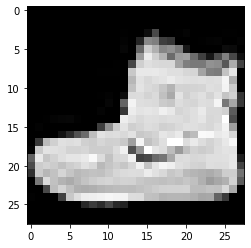

In [23]:
plt.imshow(image.squeeze(), cmap = 'gray') #cmap = color map
print('label:', label)

In [40]:
# list of vowels
vowels = ['a', 'e', 'i', 'o', 'u']
vowels_iter = iter(vowels)

print(next(vowels_iter))    # 'a'
print(next(vowels_iter))    # 'e'
print(next(vowels_iter))    # 'i'
print(next(vowels_iter))    # 'o'
print(next(vowels_iter))    # 'u'

a
e
i
o
u


In [41]:
mylist = iter(["apple", "banana", "cherry"])
x = next(mylist)
print(x)
x = next(mylist)
print(x)
x = next(mylist)
print(x)


apple
banana
cherry


In [25]:
batch =  next(iter(train_loader))

In [26]:
len(batch)

2

In [27]:
type(batch)

list

In [31]:
images, labels = batch

In [32]:
images.shape #10 images single color channel h, w = 28

torch.Size([10, 1, 28, 28])

In [42]:
images[0].shape

torch.Size([1, 28, 28])

In [43]:
labels[0]

tensor(8)

In [33]:
labels.shape

torch.Size([10])

labels: tensor([8, 7, 3, 9, 7, 7, 9, 4, 8, 6])


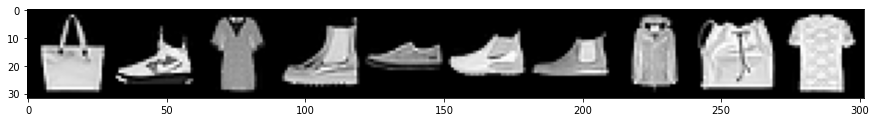

In [47]:
grid = torchvision.utils.make_grid(images, nrow=10) #no of images in a row batch size is 10 so single row of images

plt.figure(figsize = (15,15))
plt.imshow(np.transpose(grid, (1,2,0)))


print('labels:', labels)

labels: tensor([8, 7, 3, 9, 7, 7, 9, 4, 8, 6])


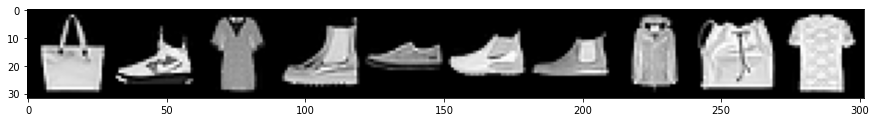

In [44]:

grid = torchvision.utils.make_grid(images, nrow=10) #nrow tells no of images in a row
plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))

print('labels:', labels)


# How To Plot Images Using PyTorch DataLoader

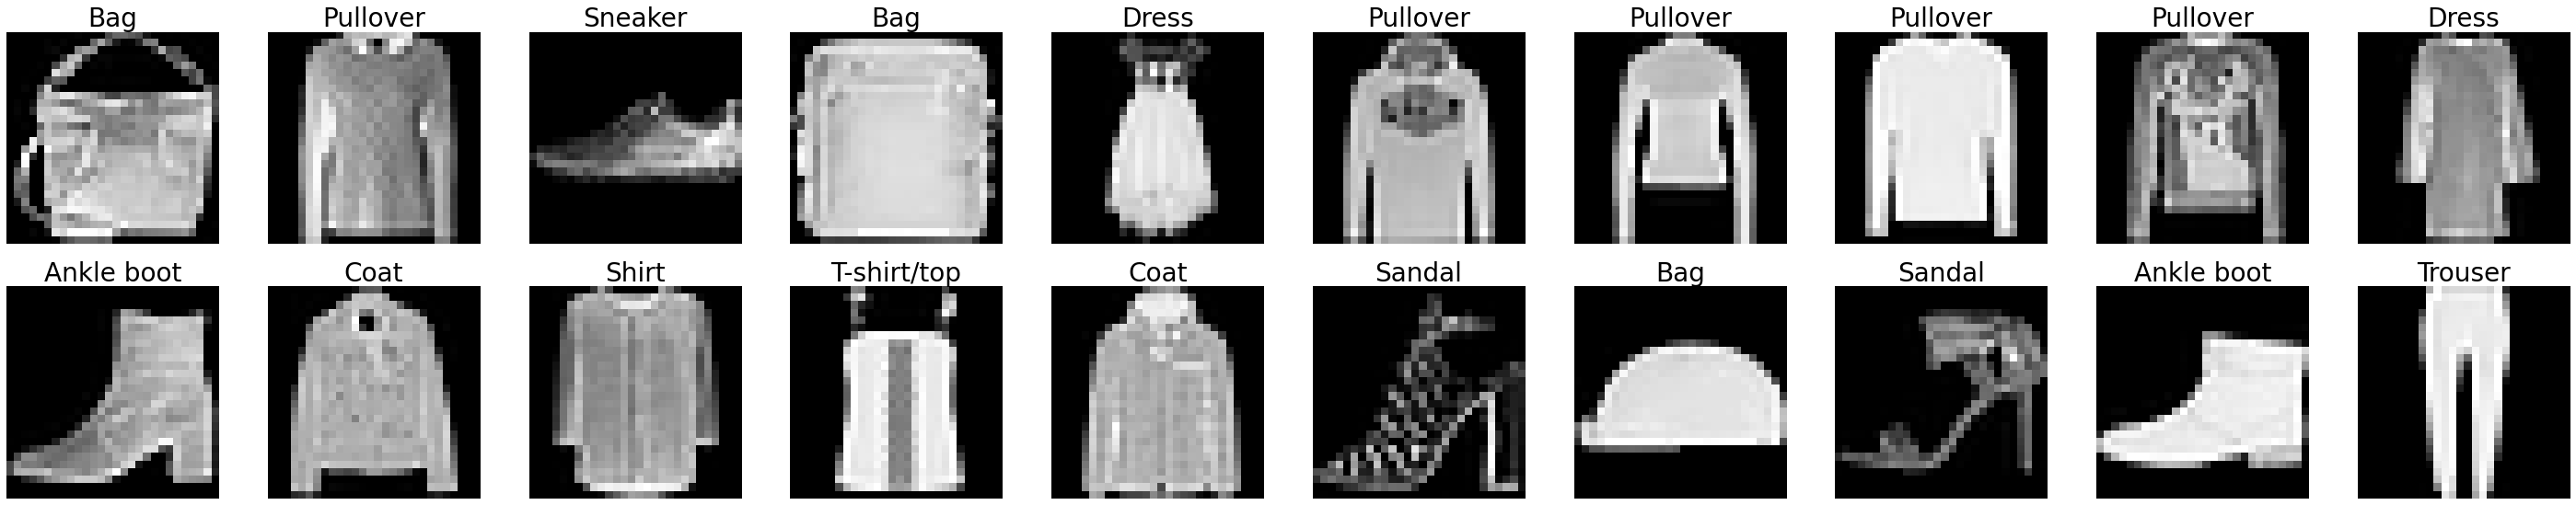

In [45]:
how_many_to_plot = 20

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True
)

plt.figure(figsize=(50,50))
for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()

In [48]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 100)



In [49]:
batch = next(iter(train_loader))
images, labels = batch

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3,
        1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8])


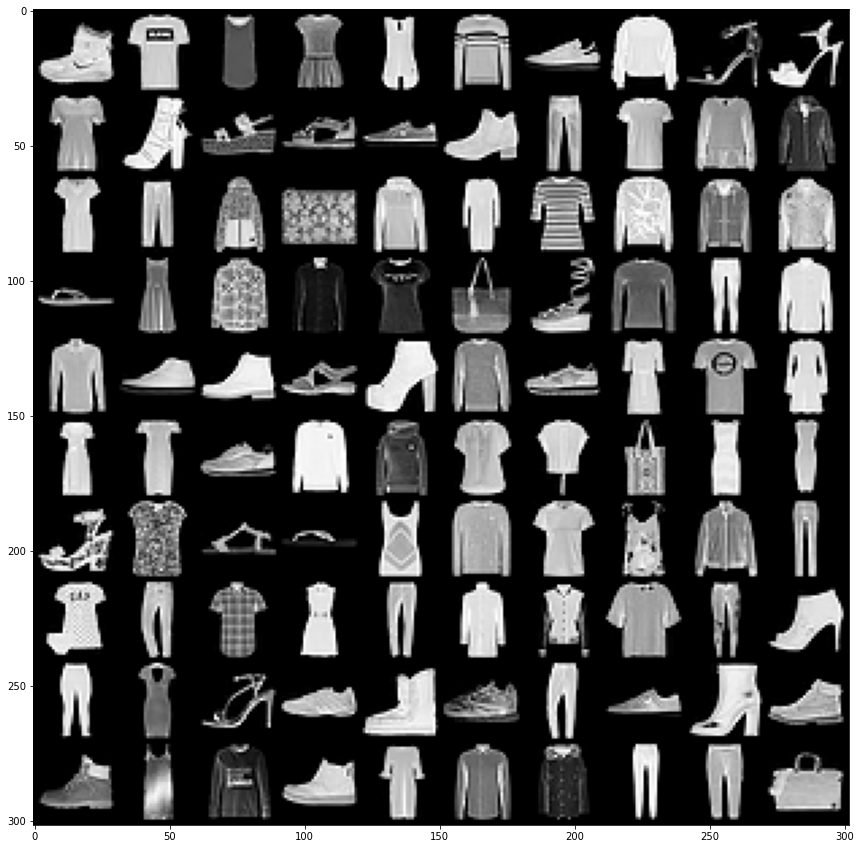

In [50]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize = (15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', labels)